#  Loan Characterics on Borrower's APR using Propser Loan Data
## by Saphal Adhikari

## Investigation Overview

>Objective:

> * What affects the borrower’s APR or interest rate?
> * Are there differences between loans depending on how large the original loan amount was?

## Dataset Overview

> The Dataset contains 113,917 loans, each row has infomation on the borrow's APR, status, borrowed amount, debt, etc. Variables with many missing values were dropped to make the Dataset more accurate. 

>On November 24, 2008, the SEC found Prosper to be in violation of the Securities Act of 1933. As a result of these findings, the SEC imposed a cease and desist order on Prosper ... In July 2009, Prosper reopened their website for lending ("investing") and borrowing after having obtained SEC registration for its loans ("notes"). After the relaunch, bidding on loans was restricted to residents of 28 U.S. states and the District of Columbia. Borrowers may reside in any of 47 states, with residents of three states (Iowa, Maine, and North Dakota) not permitted to borrow through Prosper".

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('prosperLoanData.csv')


In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

# Plotting Borrower Rate, Loan Original Amount, and Prosper Score

## Borrower APR


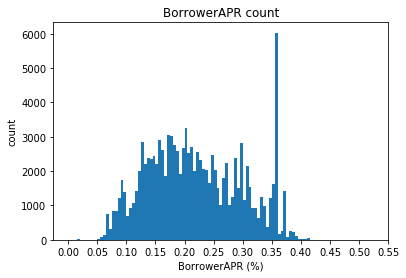

In [6]:
#plotting borrwer apr
bins = np.arange(0, df['BorrowerAPR'].max(), 0.005)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, df['BorrowerAPR'].max()+0.05, 0.05));

 The lowerest APR is at around 0.05% and the highested is at around 0.41%. Two high counts are found at 0.35797% and 0.35643%.

## BorrowerAPR vs. ProsperScore


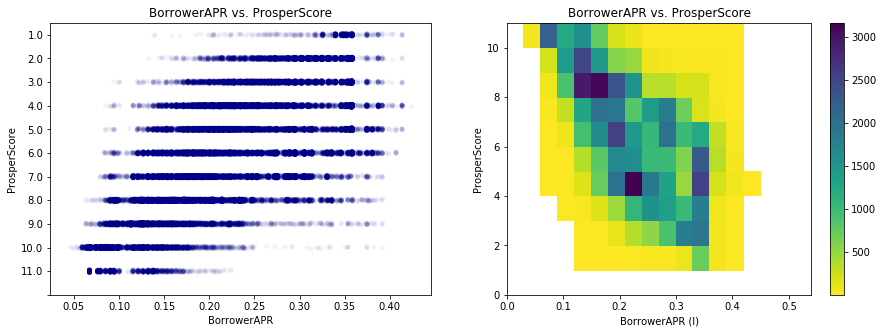

In [8]:
#plotting BorrwerAPR vs ProsperScore
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
sb.stripplot(data = df, x = 'BorrowerAPR', y = 'ProsperScore', jitter = 0.05, alpha = 0.05, orient='h',color='darkblue')
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df['ProsperScore'].max()+1, 1)
plt.hist2d(data = df, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('ProsperScore');

The plot shows the negative correlation between BorrowerAPR and ProsperScore. The plot explain the higher the APR, the lower the ProsperScore is. This makes sense because borrowers with higher rating tend to received lower interest rate and APR.


# BorrowerAPR vs ProsperScore on each ProsperRatings

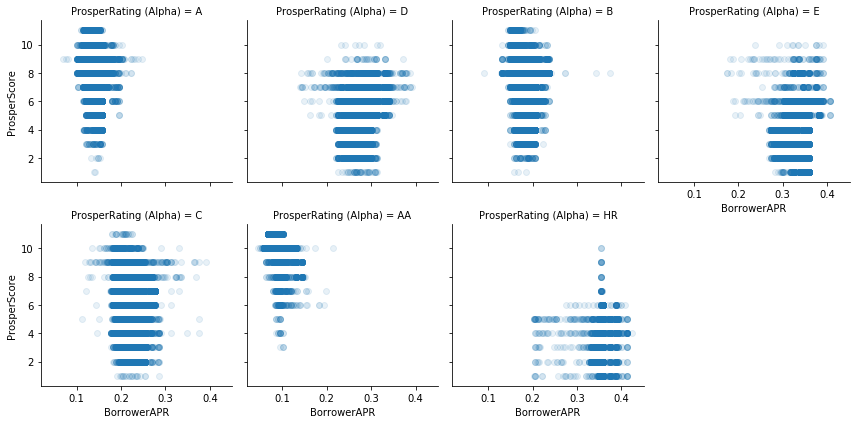

In [9]:
#Plotting borrower APr vs ProsperScore on Proser rating
g = sb.FacetGrid(data = df, col = 'ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore')

plt.show()

>The patterns shows the lowerest rating(HR) of borrowers have the highest APR percentage, and borrowers with high rating (AA) has the lowers APR percentage. This visualization differentiate groups of people in terms of APR received.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

Thank You 